# OSMnxを使用して、場所名で街路網を取得

In [2]:
import osmnx as ox
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

import sys,os,os.path
os.environ['HTTP_PROXY']="10.156.1.120:80"
os.environ['HTTPS_PROXY']="10.156.1.120:80"

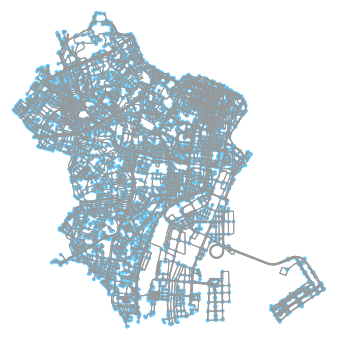

In [2]:
# 港区の歩行ネットワークを取得
G = ox.graph_from_place('Minato, Tokyo, Japan', network_type='walk')
fig, ax = ox.plot_graph(G)


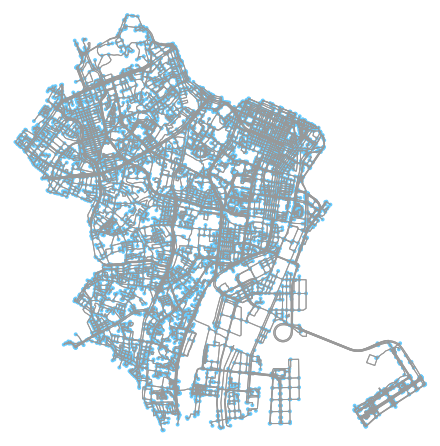

In [3]:
# ネットワークを適切なUTMに投影します（自動的に決定されます）
G_projected = ox.project_graph(G)

# 後でIllustratorで作業するSVGとして図をプロット/保存することもできます
fig, ax = ox.plot_graph(G_projected, save=True, file_format='svg')

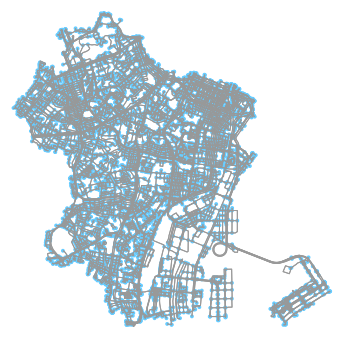

In [5]:
# また、場所の周りにバッファ距離（メートル）のネットワークを作成することもできます
G = ox.graph_from_place('Minato, Tokyo, Japan', network_type='walk', buffer_dist=100)
fig, ax = ox.plot_graph(ox.project_graph(G))

非常に大規模なネットワーク（大都市や大都市規模など）がある場合、最初にグラフを投影してからトポロジを簡素化する方がはるかに高速です。

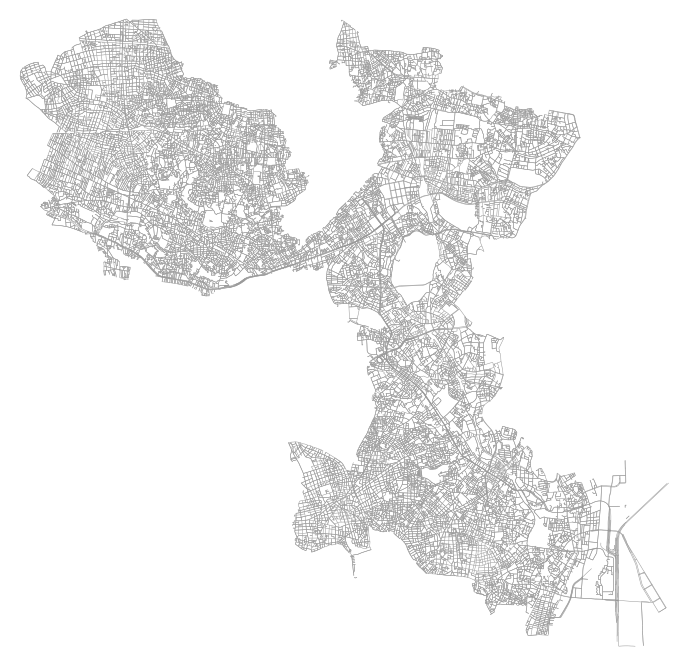

In [9]:
# 複数の場所からネットワークを作成する

place_names = ['shinjuku, Tokyo, Japan', 
               'shibuya, Tokyo, Japan',
               'shinagawa, Tokyo, Japan',
               'meguro, Tokyo, Japan',
               'suginami, Tokyo, japan']

# 接続されていないすべてのサブグラフを保持する場合は、retain_allを使用します（たとえば、場所が隣接していない場合）

G = ox.graph_from_place(place_names, network_type='drive', retain_all=True)
fig, ax = ox.plot_graph(G,  save=True, filename='places', fig_height=12, node_size=0, edge_linewidth=0.5)

In [10]:
# ネットワークをGraphMLファイルとしてディスクに保存します
ox.save_graphml(G, filename='berkeley-emeryville-piedmont.graphml')

# または、グラフをESRIシェープファイルとしてディスクに保存します
ox.save_graph_shapefile(G, filename='berkeley-emeryville-piedmont')

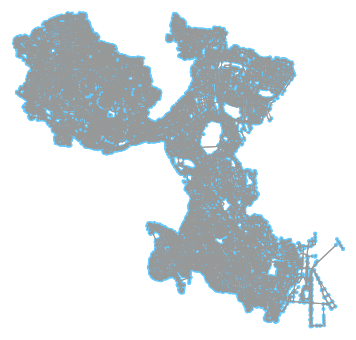

In [12]:
# また、場所のリストの周りにバッファー距離（メートル）のネットワークを作成することもできます
G = ox.graph_from_place(place_names, network_type='drive', retain_all=True, buffer_dist=100)
fig, ax = ox.plot_graph(G,  fig_height=12, node_size=0, edge_linewidth=0.5)

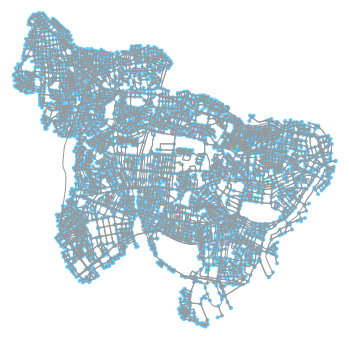

In [13]:
# または、構造化された場所クエリからネットワークを作成します
place_names = [{'city':'Shinjuku', 'state':'Tokyo'}, 
         {'city':'Shinagawa', 'state':'Tokyo'}]
G = ox.graph_from_place(place_names, network_type='drive', buffer_dist=250)
fig, ax = ox.plot_graph(G, fig_height=12, node_size=0, edge_linewidth=0.5)



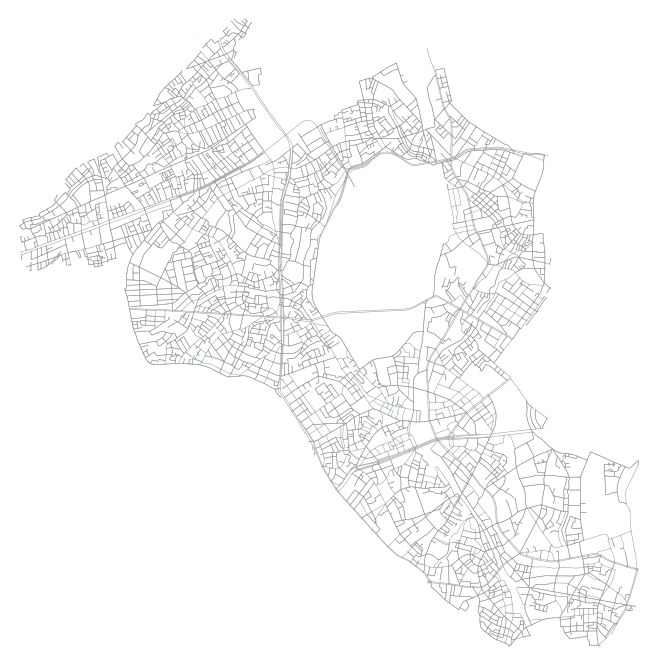

In [18]:
# 渋谷区のネットワークを取得
G = ox.graph_from_place('Shibuya, Tokyo, Japan', network_type='drive')
fig, ax = ox.plot_graph(G, fig_height=12, node_size=2, node_alpha=0.5,
                        edge_linewidth=0.5, save=True, dpi=100, filename='shibuya')


投影されたネットワークが必要な場合、大都市の場合は通常、simplify = Falseと言い、グラフを投影してから単純化する方が速いことに注意してください  
エッジアトリビュートとして埋め込まれた空間ジオメトリを使用した単純化されたグラフの投影は、大規模なネットワークでは時間がかかる場合があります

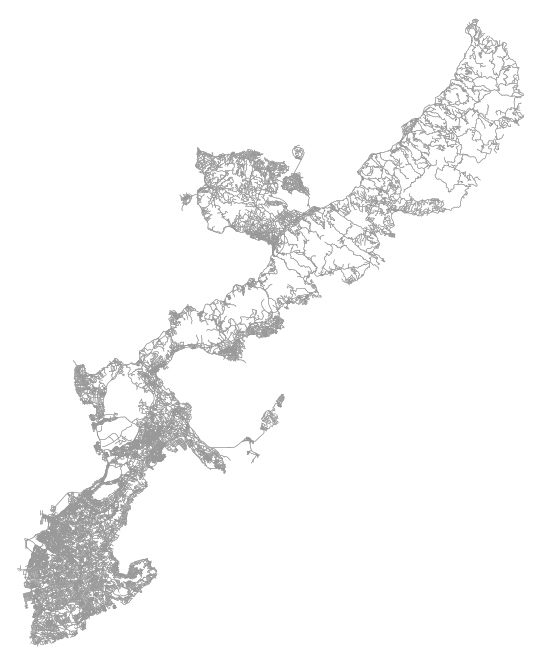

In [3]:
# 沖縄県の形に制約されたネットワークを実現
G = ox.graph_from_place('Okinawa', network_type='drive')

# ネットワークをUTM（ゾーンは自動的に計算）に投影し、プロットします
G_projected = ox.project_graph(G)
fig, ax = ox.plot_graph(G_projected, fig_height=12, node_size=0, edge_linewidth=0.5)